## Building chatbot with Langgraph (Graph api)

In [13]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


In [16]:
class State(TypedDict):
    messages: Annotated[list,add_messages]

graph_builder=StateGraph(State)


In [17]:
import os
from dotenv import load_dotenv
load_dotenv()


True

In [18]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

llm = ChatGroq (model='llama3-8b-8192')
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x1071b1f10>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x1071b0e90>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [20]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state['messages'])]}

In [31]:
graph_builder = StateGraph(State)

graph_builder.add_node("llmagent", chatbot)

graph_builder.add_edge(START, "llmagent")
graph_builder.add_edge("llmagent", END)

graph = graph_builder.compile()



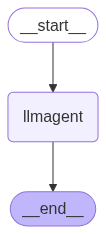

In [32]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [37]:
response = graph.invoke({"messages": ["Hello!"]})
response["messages"][-1].content

"Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?"